## Importing packages

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn import linear_model
np.random.seed(4)

## Creating datasets

In [2]:
boston = load_boston()
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data['price'] = pd.Series(boston.target)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
## Description of the features of the dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Visualization

In [5]:
# sns.pairplot(data)
# plt.show()

In [6]:
## As part of Simple linear Regression let's consider one variable only


Text(0.5,1,'Average number of rooms vs house Price')

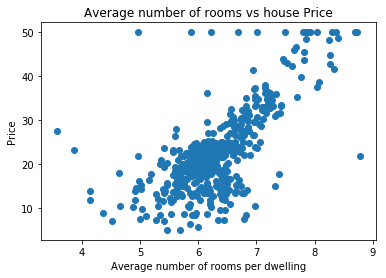

In [7]:
plt.scatter(data['RM'], data['price'])
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Price")
plt.title("Average number of rooms vs house Price")

## Creating Simple Linear Regression Model

In [8]:
y = data['price'].values.reshape(-1, 1)
X = data['RM'].values.reshape(-1, 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

## Using Linear Regression Algorithm

In [10]:
def ols(x,y):
    x_mean = x.mean()
    y_mean = y.mean()
    slope = np.multiply((x - x_mean), (y - y_mean)).sum() / np.square((x - x_mean)).sum()
    beta_0 = y_mean - (slope * x_mean)
    
    def lin_model(new_x, slope = slope, intercept=beta_0):
        return (new_x, slope, intercept)

    return lin_model

In [11]:
line_model = ols(X_train, y_train)

In [12]:
new_x, slope, intercept = line_model(X_test)

Text(0.5,1,'Average number of rooms vs house Price')

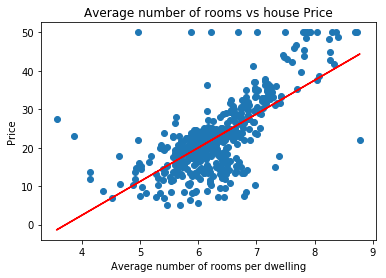

In [13]:
plt.scatter(data['RM'], data['price'])
plt.plot(data['RM'], data['RM'] * slope + intercept, '-r')
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Price")
plt.title("Average number of rooms vs house Price")

### Using SKlearn Linear Regression

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,1,'Average number of rooms vs house Price')

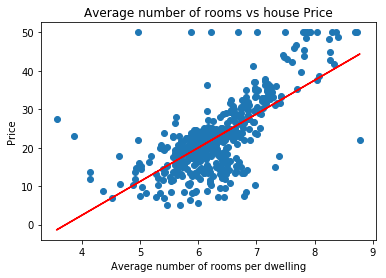

In [15]:
plt.scatter(data['RM'], data['price'])
plt.plot(data['RM'], data['RM'] * lm.coef_[0] + lm.intercept_, '-r')
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Price")
plt.title("Average number of rooms vs house Price")

Text(0.5,1,'Average number of rooms vs house Price')

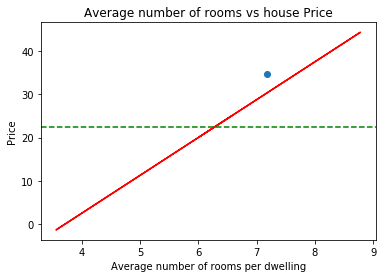

In [16]:
p = 2
plt.scatter(data['RM'][p], data['price'][p])
plt.plot(data['RM'], data['RM'] * lm.coef_[0] + lm.intercept_, '-r')
plt.axhline(y=np.mean(data['price']), color='g', linestyle='--')
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Price")
plt.title("Average number of rooms vs house Price")

In [17]:
y_pred = lm.predict(X_test)

Text(0.5,1,'Original House Price vs Predicted house Price')

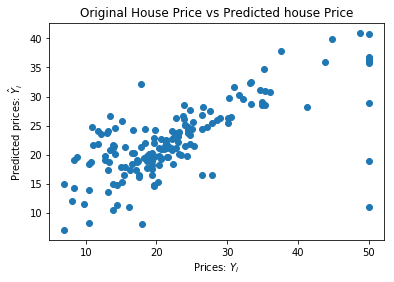

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Original House Price vs Predicted house Price")

# Batch Gradient Descent

In [142]:
def batch_gradient(X, y, m_current=0, c_current=0, epochs=500, learning_rate=0.001):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    for i in range(epochs):
        y_predicted = (m_current * X) + c_current
        
        # Cost function J(theta0, theta1)
        cost = sum([data**2 for data in (y_predicted - y)]) / 2*N
        
        # Diffrential with respect to theta 0 Gradient Descent
        c_gradient = (1/N) * sum(y_predicted - y)
        
        # Diffrential with respect to theta 1 Gradient Descent
        m_gradient = (1/N) * sum(X * (y_predicted - y))
        
        # Repeat until convergance
        m_current = m_current - (learning_rate * m_gradient)        
        c_current = c_current - (learning_rate * c_gradient)
        
        gd_df.loc[i] = [m_current[0],c_current[0],cost[0]]
    return(gd_df)

In [143]:
cost_gradient = batch_gradient(X_train,y_train)

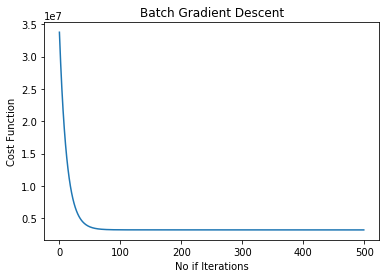

In [144]:
# Around after 30 iterations cost function has find minimum
plt.plot(cost_gradient.index, cost_gradient['cost'])
plt.xlabel('No if Iterations')
plt.ylabel('Cost Function')
plt.title('Batch Gradient Descent')
plt.show()

Text(0.5,1,'Average number of rooms vs house Price')

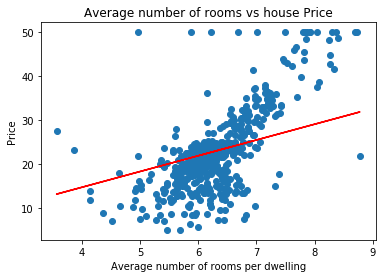

In [256]:
plt.scatter(data['RM'], data['price'])
plt.plot(data['RM'], data['RM'] * cost_gradient.iloc[cost_gradient.index[-1]].m_current + 
         cost_gradient.iloc[cost_gradient.index[-1]].c_current, '-r')
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Price")
plt.title("Average number of rooms vs house Price")

## Stocashtic Gradient Descent

In [252]:
def stocashtic_gradient_descent(X, y, m_current=0, c_current=0,learning_rate=0.5,epochs=50):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    
    for i in range(epochs):
        rand_ind = np.random.randint(0,len(y))
        X_i = X[rand_ind,:].reshape(1,X.shape[1])
        y_i = y[rand_ind].reshape(1,1)
        
        y_predicted = (m_current * X_i) + c_current
        cost = sum([data**2 for data in (y_predicted - y_i)]) / 2 * N
        m_gradient = (1/N) * sum(X_i * (y_predicted - y_i))
        c_gradient = (1/N) * sum(y_predicted - y_i)
        m_current = m_current - (learning_rate * m_gradient)        
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current[0],c_current[0],cost[0]]
    return(gd_df)

In [253]:
cost_history = stocashtic_gradient_descent(X_train, y_train)

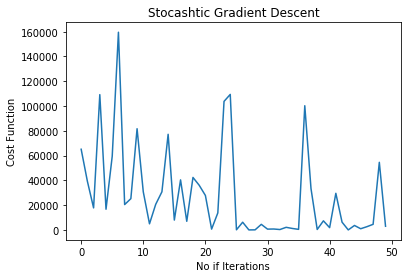

In [254]:
plt.plot(cost_history.index, cost_history['cost'])
plt.xlabel('No if Iterations')
plt.ylabel('Cost Function')
plt.title('Stocashtic Gradient Descent')
plt.show()

Text(0.5,1,'Average number of rooms vs house Price')

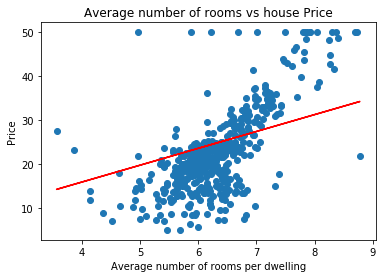

In [255]:
plt.scatter(data['RM'], data['price'])
plt.plot(data['RM'], data['RM'] * cost_history.iloc[cost_history.index[-1]].m_current + cost_history.iloc[cost_history.index[-1]].c_current, '-r')
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Price")
plt.title("Average number of rooms vs house Price")

In [170]:
clf = linear_model.SGDRegressor(max_iter=1000, tol=0.001)
clf.fit(X_train, y_train.reshape(len(y_train),))

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

Text(0.5,1,'Average number of rooms vs house Price')

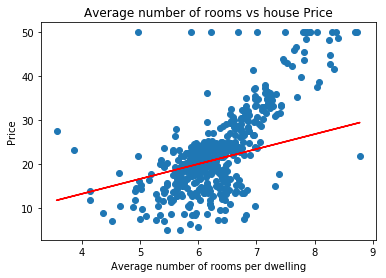

In [171]:
plt.scatter(data['RM'], data['price'])
plt.plot(data['RM'], data['RM'] * clf.coef_[0] + clf.intercept_, '-r')
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Price")
plt.title("Average number of rooms vs house Price")

## Mini Batch Gradient Descent

In [242]:
def minibatch_gradient_descent(X, y, m_current=0, c_current=0,learning_rate=0.1,epochs=200, batch_size =50):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    
    indices = np.random.permutation(len(y))
    X = X[indices]
    y = y[indices]
        
    for i in range(epochs):
        X_i = X[i:i+batch_size]
        y_i = y[i:i+batch_size]
        
        y_predicted = (m_current * X[i:i+batch_size]) + c_current
        cost = sum([data**2 for data in (y_predicted - y[i:i+batch_size])]) / 2 *N
        m_gradient = (1/N) * sum(X_i * (y_predicted - y_i))
        c_gradient = (1/N) * sum(y_predicted - y_i)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current[0],c_current[0],cost]
    return(gd_df)

In [243]:
minibatch_cost_history = minibatch_gradient_descent(X_train,y_train)

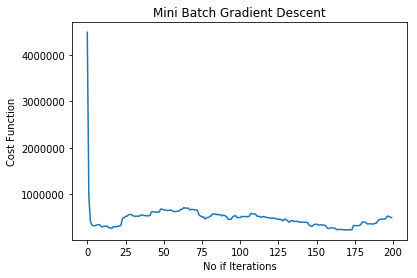

In [244]:
plt.plot(minibatch_cost_history.index, minibatch_cost_history['cost'])
plt.xlabel('No if Iterations')
plt.ylabel('Cost Function')
plt.title('Mini Batch Gradient Descent')
plt.show()

Text(0.5,1,'Average number of rooms vs house Price')

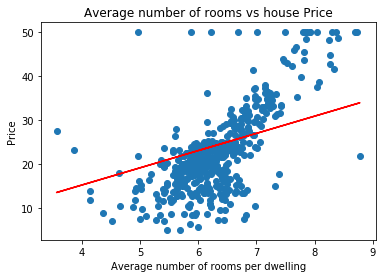

In [250]:
plt.scatter(data['RM'], data['price'])
plt.plot(data['RM'], data['RM'] * minibatch_cost_history.iloc[minibatch_cost_history.index[-1]].m_current + minibatch_cost_history.iloc[minibatch_cost_history.index[-1]].c_current, '-r')
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Price")
plt.title("Average number of rooms vs house Price")

In [257]:
# https://gist.github.com/sagarmainkar/41d135a04d7d3bc4098f0664fe20cf3c